In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-02-08 10:17:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolvendo storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:80b::2010, 2800:3f0:4004:802::2010, 2800:3f0:4004:803::2010, ...
Conectando-se a storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:80b::2010|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 68606236 (65M) [application/zip]
Salvando em: “/tmp/cats_and_dogs_filtered.zip”

/tmp/cats_and_dogs_ 100%[===================>]  65,43M  5,60MB/s    em 12s     

2021-02-08 10:17:30 (5,61 MB/s) - “/tmp/cats_and_dogs_filtered.zip” salvo [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.381.jpg', 'cat.506.jpg', 'cat.646.jpg', 'cat.439.jpg', 'cat.64.jpg', 'cat.174.jpg', 'cat.493.jpg', 'cat.830.jpg', 'cat.783.jpg', 'cat.970.jpg']
['dog.133.jpg', 'dog.382.jpg', 'dog.18.jpg', 'dog.938.jpg', 'dog.765.jpg', 'dog.699.jpg', 'dog.429.jpg', 'dog.797.jpg', 'dog.967.jpg', 'dog.615.jpg']


In [5]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

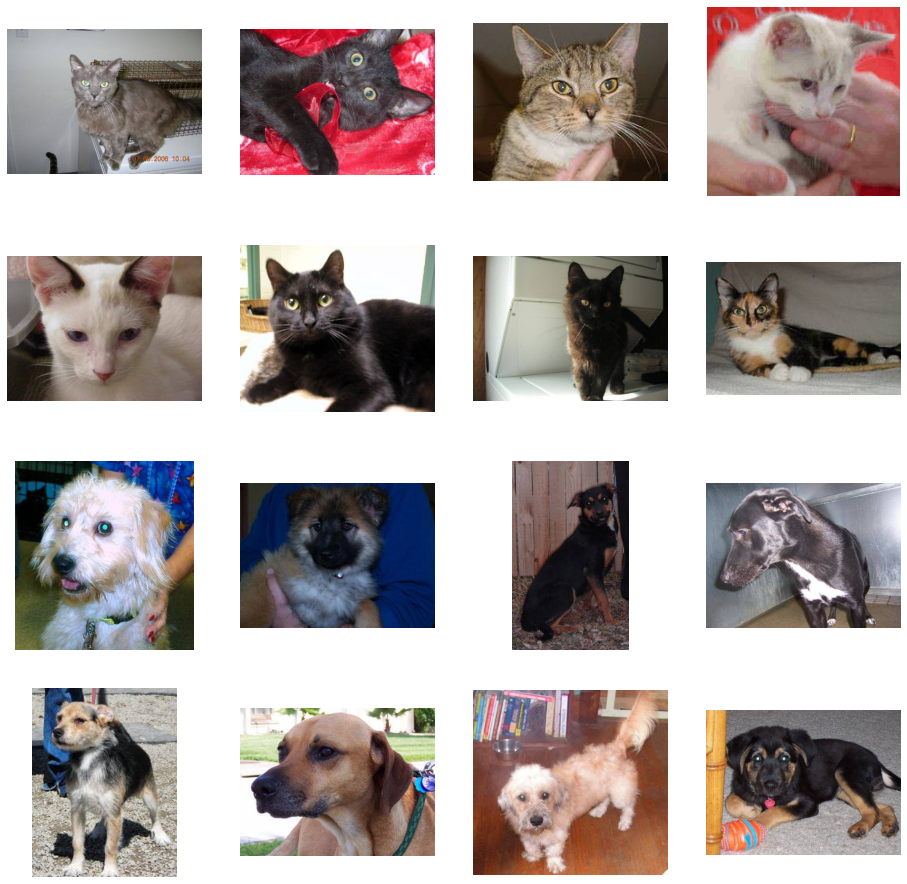

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1.0/255.)

test_datagen = ImageDataGenerator(rescale= 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(150,150))

test_generator = test_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary', target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator, validation_data=test_generator, steps_per_epoch=100, epochs=15, validation_steps=50, verbose=2)

Epoch 1/15
100/100 - 20s - loss: 0.8390 - accuracy: 0.5550 - val_loss: 0.6512 - val_accuracy: 0.6410
Epoch 2/15
100/100 - 21s - loss: 0.6393 - accuracy: 0.6460 - val_loss: 0.5961 - val_accuracy: 0.7050
Epoch 3/15
100/100 - 20s - loss: 0.5693 - accuracy: 0.7095 - val_loss: 0.5721 - val_accuracy: 0.6920
Epoch 4/15
100/100 - 21s - loss: 0.5082 - accuracy: 0.7470 - val_loss: 0.5677 - val_accuracy: 0.7160
Epoch 5/15
100/100 - 23s - loss: 0.4503 - accuracy: 0.7900 - val_loss: 0.5669 - val_accuracy: 0.7080
Epoch 6/15
100/100 - 22s - loss: 0.3978 - accuracy: 0.8115 - val_loss: 0.5712 - val_accuracy: 0.7320
Epoch 7/15
100/100 - 24s - loss: 0.3151 - accuracy: 0.8605 - val_loss: 0.7705 - val_accuracy: 0.7210
Epoch 8/15
100/100 - 22s - loss: 0.2505 - accuracy: 0.8935 - val_loss: 0.7257 - val_accuracy: 0.7170
Epoch 9/15
100/100 - 22s - loss: 0.2118 - accuracy: 0.9175 - val_loss: 0.7875 - val_accuracy: 0.7300
Epoch 10/15
100/100 - 22s - loss: 0.1437 - accuracy: 0.9455 - val_loss: 0.8524 - val_accura